<a href="https://colab.research.google.com/github/bharathdev329/ICT-DSA/blob/main/Daily_task_Missing_value_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
d=pd.read_csv('/content/churn-data-v2 (1).csv')
df=pd.DataFrame(d)
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


In [12]:
df.isna().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [13]:
# Convert 'satisfaction' column to numeric, coercing errors to NaN
df['satisfaction'] = pd.to_numeric(df['satisfaction'], errors='coerce')

# Now you can fill NaN values with the median:
df['satisfaction'].fillna(df['satisfaction'].median(), inplace=True)

<ipython-input-13-9762a6497ca6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['satisfaction'].fillna(df['satisfaction'].median(), inplace=True)


In [15]:
df['evaluation'].fillna(df['evaluation'].mean(), inplace=True)  # Or median()

<ipython-input-15-cbeda2f898a0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['evaluation'].fillna(df['evaluation'].mean(), inplace=True)  # Or median()


In [17]:
df['number_of_projects'].fillna(df['number_of_projects'].mode()[0], inplace=True)

<ipython-input-17-04616fbebdd5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_projects'].fillna(df['number_of_projects'].mode()[0], inplace=True)


In [19]:
df.isna().sum()

,0
satisfaction,0
evaluation,0
number_of_projects,0
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) # You can adjust the number of neighbors
df['average_montly_hours'] = imputer.fit_transform(df[['average_montly_hours']]) # Applying on a single column

In [23]:
# Convert the 'department' column to a categorical data type
df['department'] = pd.Categorical(df['department'])

# Add 'Unknown' as a new category to the 'department' column
df['department'] = df['department'].cat.add_categories(['Unknown'])

# Fill missing values with 'Unknown'
df['department'].fillna('Unknown', inplace=True)

<ipython-input-23-7afc5f51b631>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['department'].fillna('Unknown', inplace=True)


In [24]:
df.isna().sum()

,0
satisfaction,0
evaluation,0
number_of_projects,0
average_montly_hours,0
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,0
salary,0


In [ ]:
# prompt: code for plotting boxplot only for numerical columns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Assuming df is your DataFrame

# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


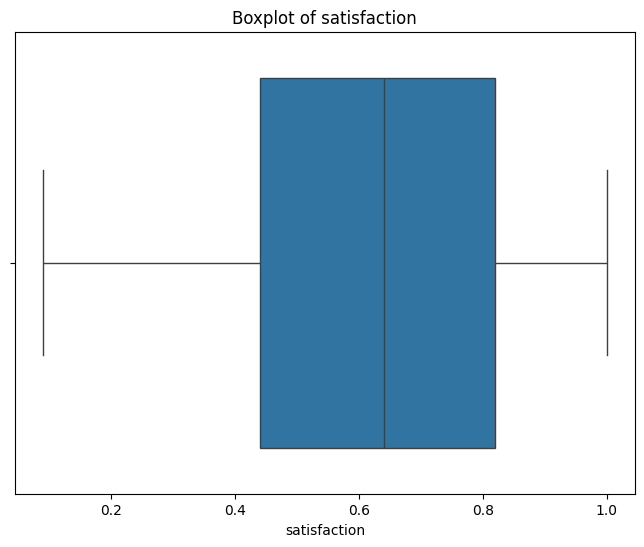

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


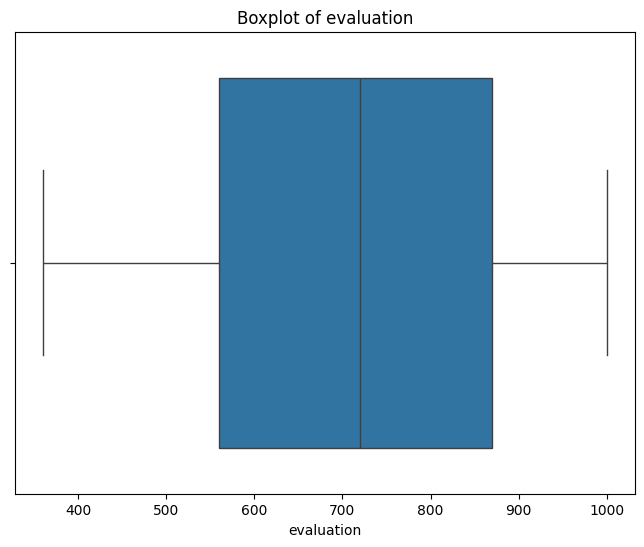

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


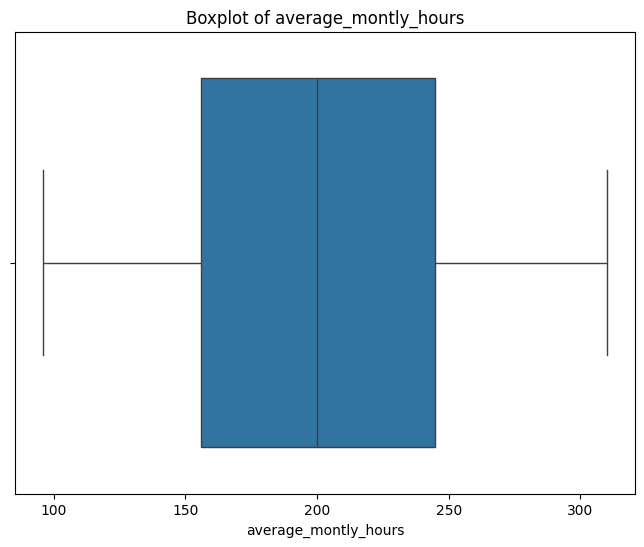

In [25]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()
